In [3]:
# This notebook note produces graphs that shows, keeping everything else constant, how the front and back irradiances
# are affected by the changes in the azimuth angle specified.  

# Based on this http://www.renewable-energy-concepts.com/solarenergy/solar-basics/orientation-azimuth-angle.html, 
# in the northern hemisphere the optimum orientation for a PV module is true south (Azimuth 180° (in Europe 0°)). 
# However, PV modules can face up to 45º east or west of true south without significantly decreasing their performance. 
# in this case I chose the following range (135, 225). However, do the graphs make sense??? 180° seems to be yielding 
# the min irradiance, although it was supposed to be optimal. Maybe I did something wrong while generating the data?  

import bifacialvf    
import os
# change directory to \bifacialvf\ root
os.chdir(os.path.dirname(bifacialvf.__file__))
%pwd

u'/Users/eleonorakiziv/Desktop/bifacialvf-master/bifacialvf'

In [8]:
# This part is responsible for generating the data. 

beta = 10
C = 1                      # GroundClearance(panel slope lengths)
rtr = 1.5                  # row to row spacing in panel lengths. 
GCR = 1.0/rtr              # Ground Cover Ratio

TMYtoread = "data/724010TYA.csv"   # VA Richmond

# Set optional variables.  These are the default values
rowType = "interior"        # RowType(first interior last single)
transFactor = 0.013         # TransmissionFactor(open area fraction)
cellRows = 6                # CellRows(# hor rows in panel)   This is the number of irradiance values returned along module chord
PVfrontSurface = "glass"    # PVfrontSurface(glass or ARglass)
PVbackSurface = "glass"     # PVbackSurface(glass or ARglass)
albedo = 0.62               # ground albedo beneath system

# 1-axis tracking instructions (optional)
tracking=False
backtrack=True       # backtracking optimization as defined in pvlib

sazm = 135                  # PV Azimuth(deg)

while sazm < 226: 
    writefiletitle = "data/Output/azimuthcalc" + str(sazm) 
    bifacialvf.simulate(TMYtoread, writefiletitle, beta, sazm, 
                C=C, rtr=rtr, rowType=rowType, transFactor=transFactor, cellRows=cellRows,
                PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, albedo=albedo, 
                tracking=tracking, backtrack=backtrack, )
    sazm = sazm+1

 
********* 
Running Simulation for TMY3:  data/724010TYA.csv
Location:   "RICHMOND INTERNATIONAL AP"
Lat:  37.517  Long:  -77.317  Tz  -5.0
Parameters: beta:  10   Sazm:  135   Height:  1   rtr separation:  1.5   Row type:  interior   Albedo:  0.62
Saving into data/Output/azimuthcalc135
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.611117440909
Actual distance between rows =  0.515192246988
 
Finished


The bifacial ratio for azimuth angle 135 is: 17.7%
The bifacial ratio for azimuth angle 136 is: 17.6%
The bifacial ratio for azimuth angle 137 is: 17.5%
The bifacial ratio for azimuth angle 138 is: 17.5%
The bifacial ratio for azimuth angle 139 is: 17.4%
The bifacial ratio for azimuth angle 140 is: 17.4%
The bifacial ratio for azimuth angle 141 is: 17.3%
The bifacial ratio for azimuth angle 142 is: 17.3%
The bifacial ratio for azimuth angle 143 is: 17.2%
The bifacial ratio for azimuth angle 144 is: 17.2%
The bifacial ratio for azimuth angle 145 is: 17.1%
The bifacial ratio for azimuth angle 146 is: 17.1%
The bifacial ratio for azimuth angle 147 is: 17.1%
The bifacial ratio for azimuth angle 148 is: 17.0%
The bifacial ratio for azimuth angle 149 is: 17.0%
The bifacial ratio for azimuth angle 150 is: 16.9%
The bifacial ratio for azimuth angle 151 is: 16.9%
The bifacial ratio for azimuth angle 152 is: 16.8%
The bifacial ratio for azimuth angle 153 is: 16.8%
The bifacial ratio for azimuth 

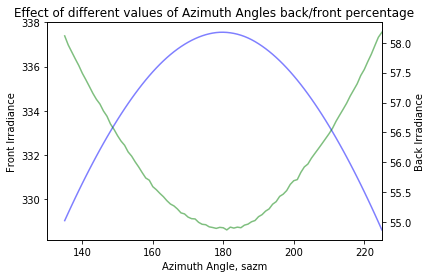

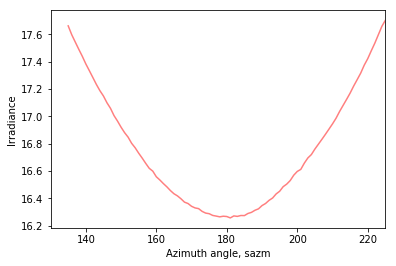

In [9]:
# This part is responsible for interpreting the data. 

from loadVFresults import loadVFresults
irradiance = {};
backIrr = {};
frontIrr = {}; 


for x in xrange (135, 226):
    (data, metadata) = loadVFresults("data/Output/AzimuthAngles/azimuthcalc" + str(x))

    # calculate average front and back global tilted irradiance across the module chord
    data['GTIFrontavg'] = data[['No_1_RowFrontGTI', 'No_2_RowFrontGTI','No_3_RowFrontGTI','No_4_RowFrontGTI','No_5_RowFrontGTI','No_6_RowFrontGTI']].mean(axis=1)
    data['GTIBackavg'] = data[['No_1_RowBackGTI', 'No_2_RowBackGTI','No_3_RowBackGTI','No_4_RowBackGTI','No_5_RowBackGTI','No_6_RowBackGTI']].mean(axis=1)

    # Print the annual bifacial ratio
    frontIrrSum = data['GTIFrontavg'].sum()
    backIrrSum = data['GTIBackavg'].sum()
    percentage = backIrrSum/frontIrrSum*100
    print('The bifacial ratio for azimuth angle {} is: {:.1f}%'.format(x, percentage))
    
    irradiance[x] = percentage
    backIrr[x] = data['GTIBackavg'].mean()
    frontIrr[x] = data['GTIFrontavg'].mean()
    
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# This is how the front and back irradiances are affected by different values of azimuth angles
fig, ax = plt.subplots()
ax.set_title('Effect of different values of Azimuth Angles on Back (Green) and Front (Blue) Irradiances')
plt.xlim(130, 225)
ax1 = ax.twinx()
ax.set_xlabel("Azimuth Angle, sazm")
ax1.set_ylabel("Back Irradiance")
ax.set_ylabel("Front Irradiance")
ax.plot(list(irradiance.keys()), frontIrr.values(), 'b', alpha = 0.5)
ax1.plot(list(irradiance.keys()), backIrr.values(), 'g', alpha = 0.5)


# This is how bifacial ratio is affected by difference azimuth angles 
fig2, ax2 = plt.subplots()
ax.set_title('Effect of different values of Azimuth on bifacial ratio')
plt.xlim(130, 225)
ax2.set_xlabel("Azimuth angle, sazm")
ax2.set_ylabel("Irradiance")
ax2.plot(list(irradiance.keys()), irradiance.values(), 'r', alpha = 0.5)


